In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
df = pd.read_csv('Droplet_Data.csv', encoding= 'unicode_escape')
df.head()

,Mean droplet size (µm2),Droplet count,Process interval,Category
0,34.597073,1394,0,U
1,37.834522,1294,0,U
2,37.423876,1338,0,U
3,36.133785,1374,0,U
4,31.652493,1566,0,U


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Mean droplet size (µm2)  150 non-null    float64
 1   Droplet count            150 non-null    int64  
 2   Process interval         150 non-null    int64  
 3   Category                 150 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [4]:
df

,Mean droplet size (µm2),Droplet count,Process interval,Category
0,34.597073,1394,0,U
1,37.834522,1294,0,U
2,37.423876,1338,0,U
3,36.133785,1374,0,U
4,31.652493,1566,0,U
...,...,...,...,...
145,6.671160,6390,70,T
146,6.713676,6657,70,T
147,6.990750,6207,70,T
148,7.250347,6097,70,T


In [5]:
df.describe()

,Mean droplet size (µm2),Droplet count,Process interval
count,150.000000,150.000000,150.000000
mean,16.439957,3809.126667,35.000000
std,10.472195,1672.896561,21.674839
min,6.631277,1294.000000,0.000000
25%,9.682469,1865.750000,15.000000
50%,10.852975,4199.000000,35.000000
75%,25.610785,4615.250000,55.000000
max,39.231232,6657.000000,70.000000


In [6]:
set(df['Category'].values)

{'A', 'M', 'T', 'U'}

In [7]:
from sklearn import preprocessing

In [8]:
std_scale = preprocessing.StandardScaler().fit(df[['Mean droplet size (µm2)','Droplet count']])
df_std = std_scale.transform(df[['Mean droplet size (µm2)','Droplet count']])
df_std

array([[ 1.7396491 , -1.44851608],
       [ 2.04983193, -1.50849289],
       [ 2.01048753, -1.4821031 ],
       [ 1.88688283, -1.46051144],
       [ 1.45752631, -1.34535595],
       [ 1.94772078, -1.4425184 ],
       [ 1.9236577 , -1.45211469],
       [ 1.81142333, -1.4575126 ],
       [ 1.86707697, -1.45271446],
       [ 1.92477797, -1.46411005],
       [ 1.43951015, -1.36694761],
       [ 1.4013205 , -1.33276082],
       [ 1.46916732, -1.35675155],
       [ 1.50955254, -1.37174575],
       [ 1.93787141, -1.43292211],
       [ 1.61916807, -1.39993486],
       [ 1.61829793, -1.35975039],
       [ 2.11864282, -1.43352187],
       [ 1.92233342, -1.4425184 ],
       [ 1.90748964, -1.44611701],
       [ 1.36099741, -1.28837798],
       [ 1.71921141, -1.37114599],
       [ 1.85007473, -1.39693602],
       [ 2.18365192, -1.46351028],
       [ 2.11041528, -1.44671677],
       [ 1.70863   , -1.38614019],
       [ 1.57706498, -1.37774344],
       [ 1.50605766, -1.33096152],
       [ 1.60708604,

In [9]:
minmax = preprocessing.MinMaxScaler().fit(df[['Mean droplet size (µm2)','Droplet count']])
df_minmax = minmax.transform(df[['Mean droplet size (µm2)','Droplet count']])
df_minmax

array([[0.85784769, 0.01864628],
       [0.95715608, 0.        ],
       [0.94455955, 0.00820436],
       [0.90498616, 0.01491702],
       [0.76752302, 0.05071788],
       [0.92446409, 0.02051091],
       [0.91676003, 0.0175275 ],
       [0.88082698, 0.01584934],
       [0.8986451 , 0.01734104],
       [0.9171187 , 0.01379825],
       [0.76175495, 0.04400522],
       [0.74952812, 0.0546336 ],
       [0.77125001, 0.04717509],
       [0.78417978, 0.04251352],
       [0.92131071, 0.02349431],
       [0.81927438, 0.03374977],
       [0.81899579, 0.04624277],
       [0.97918663, 0.02330785],
       [0.91633605, 0.02051091],
       [0.91158365, 0.01939213],
       [0.73661824, 0.06843185],
       [0.85130434, 0.04269998],
       [0.89320165, 0.03468208],
       [1.        , 0.01398471],
       [0.97655249, 0.01920567],
       [0.84791659, 0.03803841],
       [0.80579462, 0.04064889],
       [0.78306085, 0.05519299],
       [0.81540619, 0.04102182],
       [0.83289027, 0.03449562],
       [0.

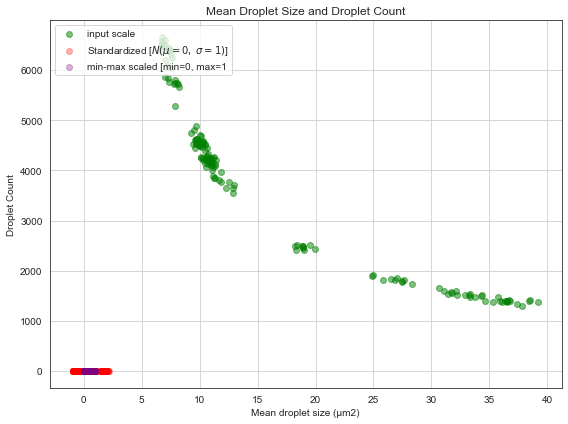

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(df['Mean droplet size (µm2)'], df['Droplet count'], color='green', label='input scale', alpha=0.5)
plt.scatter(df_std[:,0], df_std[:,1], color='red', label='Standardized [$N (\mu=0, \; \sigma=1)$]', alpha=0.3)
plt.scatter(df_minmax[:,0], df_minmax[:,1], color='purple', label='min-max scaled [min=0, max=1', alpha=0.3)
plt.title('Mean Droplet Size and Droplet Count')
plt.xlabel('Mean droplet size (µm2)')
plt.ylabel('Droplet Count')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


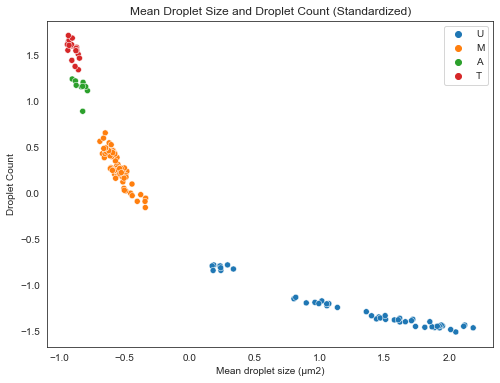

In [11]:
plt.figure(figsize=(8,6))

sns.scatterplot(df_std[:,0], df_std[:,1], hue=df['Category'], data=df_std)
plt.title('Mean Droplet Size and Droplet Count (Standardized)')
plt.xlabel('Mean droplet size (µm2)')
plt.ylabel('Droplet Count')
plt.legend(loc='upper right')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


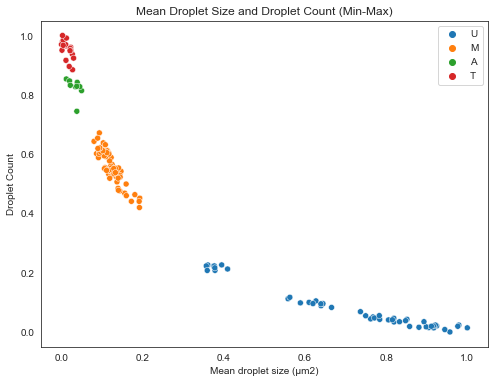

In [12]:
plt.figure(figsize=(8,6))

sns.scatterplot(df_minmax[:,0], df_minmax[:,1], hue=df['Category'], data=df_minmax)
plt.title('Mean Droplet Size and Droplet Count (Min-Max)')
plt.xlabel('Mean droplet size (µm2)')
plt.ylabel('Droplet Count')
plt.legend(loc='upper right')

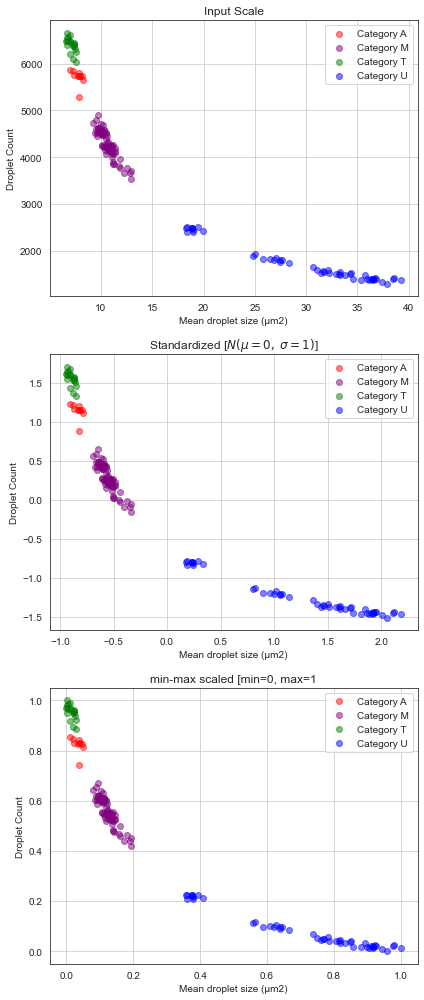

In [13]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
                 (df[['Mean droplet size (µm2)','Droplet count']].values, df_std, df_minmax),
                 ('Input Scale',
                 'Standardized [$N (\mu=0, \; \sigma=1)$]',
                 'min-max scaled [min=0, max=1'),
                ):
    for i,c in zip(('A', 'M', 'T', 'U'), ('red', 'purple', 'green', 'blue')):
                ax[a].scatter(d[df['Category'].values == i, 0],
                             d[df['Category'].values == i, 1],
                             alpha=0.5,
                             color=c,
                             label='Category %s' %i
                             )
    ax[a].set_title(l)
    ax[a].set_xlabel('Mean droplet size (µm2)')
    ax[a].set_ylabel('Droplet Count')
    ax[a].legend(loc='upper right')
    ax[a].grid()
plt.tight_layout()
    